# Banco de dados - Histórico de cotações de fechamento Ptax de compra e venda do BCB (Banco Central do Brasil)
Este notebook contém os códigos necessários para a criação do banco de dados que receberá os dados das taxas no notebook "historico_taxas_bcb". O banco foi estruturado seguindo metodologias de BI (dimensões e fatos).

### Importação de bibliotecas e conexão com banco
O SQLite foi utilizado para criação do banco de dados "cotacao_dw".

In [1]:
import sqlite3

In [2]:
conexao = sqlite3.connect('cotacao_dw.db')
cursor = conexao.cursor()

### Criação de tabelas
O esquema pensado para o banco está descrito no diagrama abaixo, mantendo os dados de "cadastro" das moedas na dimensão "dim_moeda" e duas fatos para registro das taxas ("fat_taxa") e registro de última execução da carga ("fat_carga").
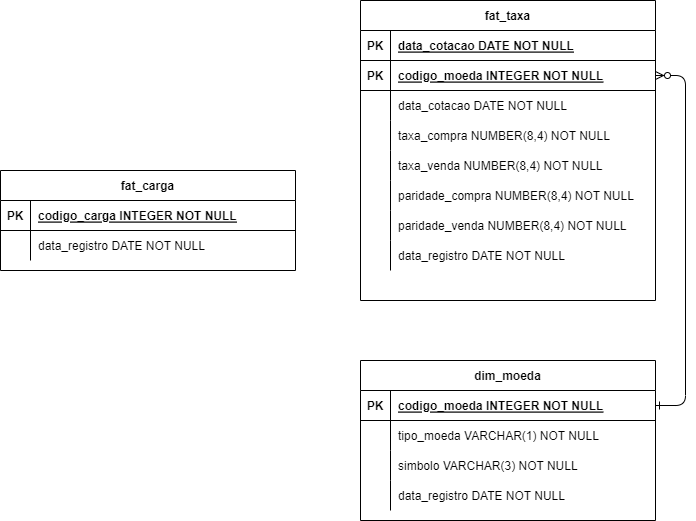

In [3]:
conexao.execute('DROP TABLE IF EXISTS stg_cotacao;')

query_stg_cotacao = """
    CREATE TABLE stg_cotacao (
        data_cotacao DATE NOT NULL,
        codigo_moeda INTEGER NOT NULL,
        tipo_moeda VARCHAR(1) NOT NULL,
        simbolo VARCHAR(3) NOT NULL,
        taxa_compra NUMBER(8,4) NOT NULL,
        taxa_venda NUMBER(8,4) NOT NULL,
        paridade_compra NUMBER(8,4) NOT NULL,
        paridade_venda NUMBER(8,4) NOT NULL,
        data_registro DATETIME DEFAULT (datetime('now','localtime'))
    );
"""
cursor.execute(query_stg_cotacao)

In [4]:
conexao.execute('DROP TABLE IF EXISTS dim_moeda;')

query_dim_moeda = """
    CREATE TABLE dim_moeda (
        codigo_moeda INTEGER PRIMARY KEY NOT NULL,
        tipo_moeda VARCHAR(1) NOT NULL,
        simbolo VARCHAR(3) NOT NULL,
        data_registro DATETIME DEFAULT (datetime('now','localtime'))
    )
"""
cursor.execute(query_dim_moeda)

In [5]:
conexao.execute('DROP TABLE IF EXISTS fat_taxa;')

query_fat_taxa = """
    CREATE TABLE fat_taxa (
        data_cotacao DATE NOT NULL,
        codigo_moeda INTEGER NOT NULL,
        taxa_compra NUMBER(8,4) NOT NULL,
        taxa_venda NUMBER(8,4) NOT NULL,
        paridade_compra NUMBER(8,4) NOT NULL,
        paridade_venda NUMBER(8,4) NOT NULL,
        data_registro DATETIME DEFAULT (datetime('now','localtime')),
        CONSTRAINT pk_fat_taxa PRIMARY KEY (data_cotacao, codigo_moeda)
        CONSTRAINT fk_fat_taxa_dim_moeda FOREIGN KEY (codigo_moeda) REFERENCES dim_moeda(codigo_moeda)
    );
"""
cursor.execute(query_fat_taxa)

In [6]:
conexao.execute('DROP TABLE IF EXISTS fat_carga;')

query_fat_carga = """
    CREATE TABLE fat_carga (
        codigo_carga INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        data_registro DATETIME DEFAULT (datetime('now','localtime'))
    );
"""
cursor.execute(query_fat_carga)

In [7]:
conexao.close()